<a href="https://colab.research.google.com/github/yeyomuri/probabilidad/blob/main/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


##MLE como base para la regresion logística

Considere el problema de MLE (Estimacion de máxima veresimilitud):

\begin{align} 
\max \sum_{i=1} \log P(y_i|x_i;h)
\end{align}

Donde:

$y_i$ es la clase o categoría de cada elemento y $x_i$ son los atributos de cada elemento, donde además cada elemento de dataset satisface una distribución de bernulli:

\begin{align}
        \text{P}(y) = \left\{
        \begin{array}{cl}
        p & si\,\,\,\,y = 1, \\
        1 - p & si\,\,\,\,y = 0.
        \end{array}
        \right.
\end{align}

En este caso la veresimilitud esta dada por: 

\begin{align}
L = \hat{y}y + (1 - \hat{y})(1 - y)
\end{align}

Esta funcion da probabilidades altas cuando $\hat{y}$ ~ $y$

In [16]:
def likelihood(y, yp):
  return yp*y + (1 - yp) * (1 - y)

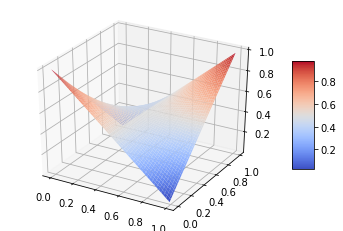

In [18]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

Y = np.arange(0.0, 1.0, 0.01)
YP = np.arange(0.0, 1.0, 0.01)
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

surf = ax.plot_surface(Y, YP, Z, cmap = cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos: 

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy. 

##Regresión logística con Scikit-learn

Recordemos que:
\begin{align}
\hat{y}= \frac{1}{1 + e^\left(-\log-odds \right)}
\end{align}

donde $\log-odds = Β_0 + Β_{1x1} + Β_{nxn}$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris:

* Flores iris [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

* Dataset flores iris [scikit](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)


In [22]:
atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width'] #Atributos
X, y =load_iris(return_X_y=True)

In [26]:
X[:2]
y[:100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
clf = LogisticRegression(random_state = 10, solver = 'liblinear').fit(X[:100], y[:100])#Generados aleatorio, metodo ooptimiaador del modelo

Revisamos los parámetros resultantes $Β_i: $

In [30]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])